In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'/content/mouse_viral_study.csv')
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


# **Exploratory Data Analysis**

In [3]:
df.isnull().sum()

,0
Med_1_mL,0
Med_2_mL,0
Virus Present,0


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Med_1_mL,400.0,5.447984,2.319059,1.0,3.249062,5.393776,7.630389,10.0
Med_2_mL,400.0,5.616750,2.336637,1.0,3.431311,5.638471,7.782614,10.0
Virus Present,400.0,0.500000,0.500626,0.0,0.000000,0.500000,1.000000,1.0


# **Visualization**

In [7]:
value_counts = df['Virus Present'].value_counts()
value_counts

,count
Virus Present,
0,200
1,200


In [8]:
value_counts.keys()

Index([0, 1], dtype='int64', name='Virus Present')

In [9]:
value_counts.values

array([200, 200])

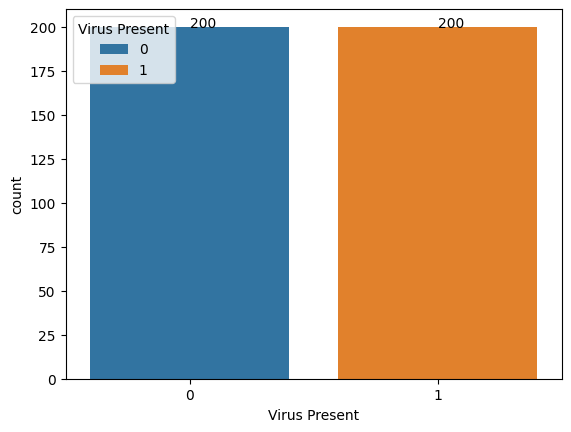

In [10]:
# bar plot that shows the total counts per target value

sns.countplot(x='Virus Present', data=df,hue = 'Virus Present')
for i,j in zip(value_counts.keys(),value_counts.values):
  plt.text(i,j,j)

**Classes**

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

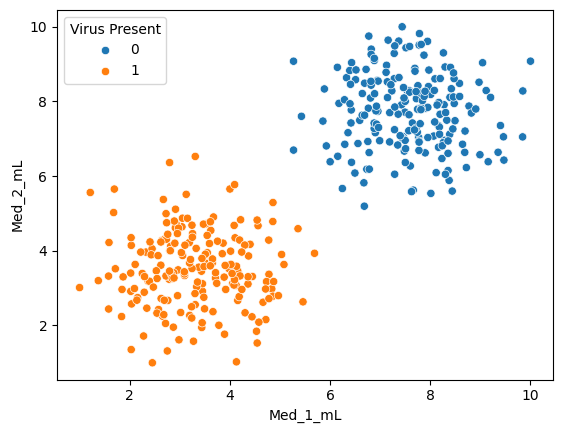

In [11]:
sns.scatterplot(x = 'Med_1_mL',y = 'Med_2_mL',hue = 'Virus Present',data = df)

In [12]:
# pairplot that displays the relationships between the following columns:

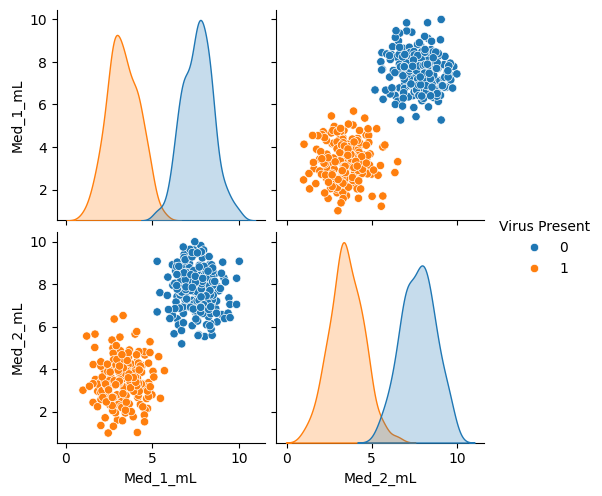

In [13]:
sns.pairplot(df,hue = 'Virus Present')

In [14]:
 # heatmap that displays the correlation between all the columns

In [15]:
df.corr()

,Med_1_mL,Med_2_mL,Virus Present
Med_1_mL,1.000000,0.828090,-0.922304
Med_2_mL,0.828090,1.000000,-0.903718
Virus Present,-0.922304,-0.903718,1.000000


<Axes: >

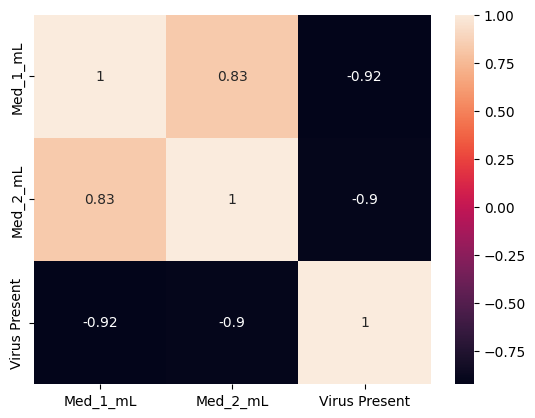

In [16]:
sns.heatmap(df.corr(),annot = True)

#**Machine Learning**

#Train | Test Split and Scaling

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = df.drop('Virus Present',axis = 1)
y = df['Virus Present']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.1,random_state = 42)

In [20]:
len(x_train),len(y_train),len(x_test),len(y_test)

(360, 360, 40, 40)

In [21]:
# Scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#**SVM - Support Vector Machine**

In [38]:
from sklearn.svm import SVC

In [39]:
svc_model = SVC(kernel='rbf')
svc_model.fit(x,y)

SVC(C=0.005)

In [40]:
#shows boundary line for each data point , outliers get marked

def plot_svm_boundary(model,x,y):
  plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y,s=30,cmap = 'RdBu')
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  xx = np.linspace(xlim[0],xlim[1],30)
  yy = np.linspace(ylim[0],ylim[1],30)
  YY,XX = np.meshgrid(yy,xx)
  xy = np.c_[XX.ravel(), YY.ravel()]
  z = svc_model.decision_function(xy).reshape(XX.shape)

  ax.contour(XX,YY,z,color='k',levels=[-1,0,1],alpha=0.5,linestyle=['--','-','--'])
  ax.scatter(svc_model.support_vectors_[:,0],svc_model.support_vectors_[:,1],s=100,linewidth=1,facecolors='none',edgecolors='k')
  plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/tmp/ipython-input-40-2128561975.py:15: UserWarning: The following kwargs were not used by contour: 'color', 'linestyle'
  ax.contour(XX,YY,z,color='k',levels=[-1,0,1],alpha=0.5,linestyle=['--','-','--'])


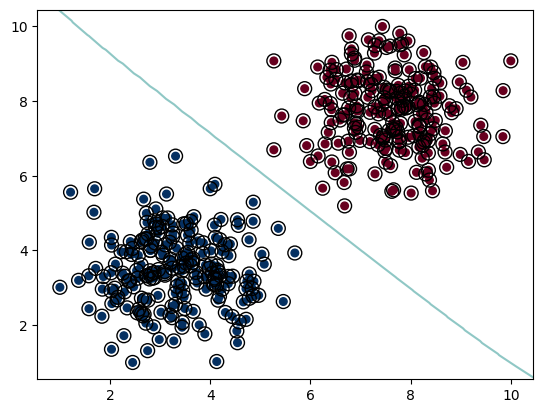

In [41]:
plot_svm_boundary(svc_model,x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/tmp/ipython-input-40-2128561975.py:15: UserWarning: The following kwargs were not used by contour: 'color', 'linestyle'
  ax.contour(XX,YY,z,color='k',levels=[-1,0,1],alpha=0.5,linestyle=['--','-','--'])


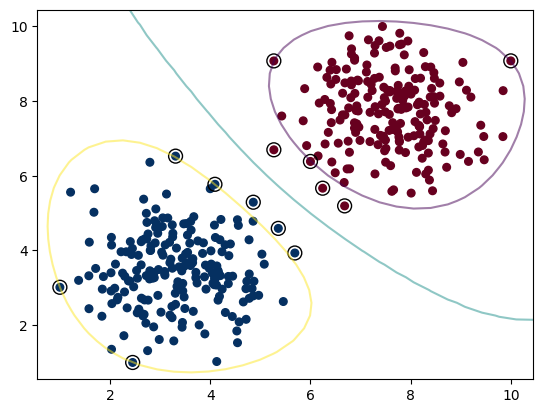

In [42]:
#using radial basis function
svc_model = SVC(kernel='rbf', C=1)
svc_model.fit(x, y)
plot_svm_boundary(svc_model,x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/tmp/ipython-input-40-2128561975.py:15: UserWarning: The following kwargs were not used by contour: 'color', 'linestyle'
  ax.contour(XX,YY,z,color='k',levels=[-1,0,1],alpha=0.5,linestyle=['--','-','--'])


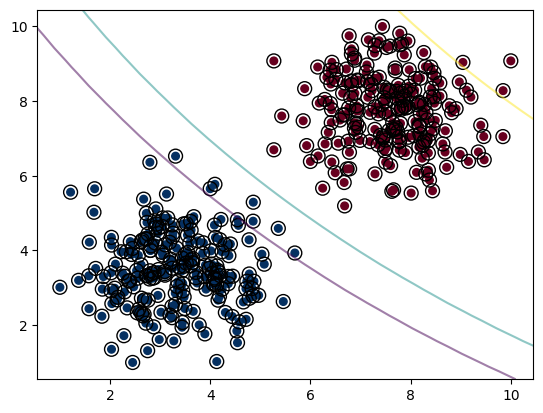

In [43]:
#using radial basis function
svc_model = SVC(kernel='sigmoid')
svc_model.fit(x, y)
plot_svm_boundary(svc_model,x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/tmp/ipython-input-40-2128561975.py:15: UserWarning: The following kwargs were not used by contour: 'color', 'linestyle'
  ax.contour(XX,YY,z,color='k',levels=[-1,0,1],alpha=0.5,linestyle=['--','-','--'])


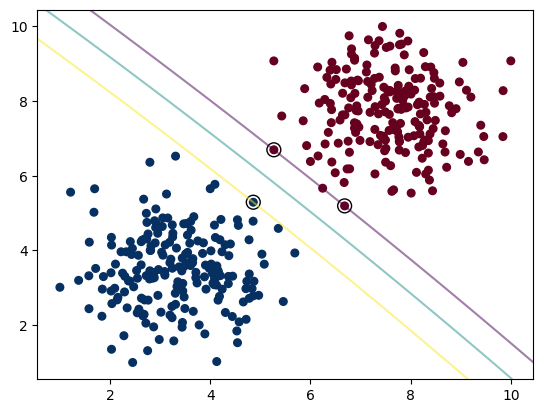

In [44]:
#using radial basis function
svc_model = SVC(kernel='poly', C=1,degree = 2)
svc_model.fit(x, y)
plot_svm_boundary(svc_model,x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/tmp/ipython-input-40-2128561975.py:15: UserWarning: The following kwargs were not used by contour: 'color', 'linestyle'
  ax.contour(XX,YY,z,color='k',levels=[-1,0,1],alpha=0.5,linestyle=['--','-','--'])


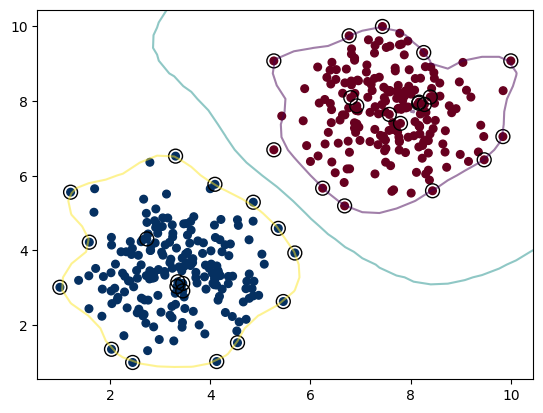

In [45]:
#using radial basis function
svc_model = SVC(kernel='rbf', C=1,gamma = 'auto')
svc_model.fit(x, y)
plot_svm_boundary(svc_model,x,y)

In [46]:
y_pred = svc_model.predict(x_test)
y_pred


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

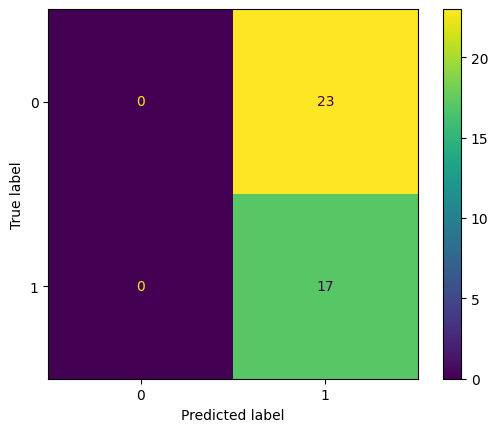

In [47]:
#Evaluation
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
diplay = ConfusionMatrixDisplay(cm)
diplay.plot()
plt.show()


In [48]:
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print(f'Precision: {precision}\nRecall: {recall}')

Precision: 0.425
Recall: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


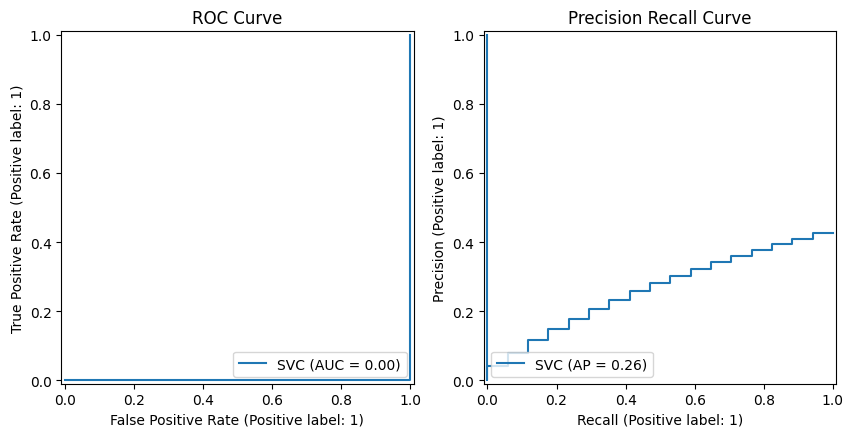

In [49]:
# ROC & Precision Recall
from sklearn.metrics import RocCurveDisplay,PrecisionRecallDisplay

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
RocCurveDisplay.from_estimator(svc_model,x_test,y_test,ax = ax1)
ax1.set_title('ROC Curve')
PrecisionRecallDisplay.from_estimator(svc_model,x_test,y_test,ax = ax2)
ax2.set_title('Precision Recall Curve')
plt.show()

**As we see model performance is worst, we'll best fit model using GridSearchCV**

#**GridSearchCV**

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
parameters ={
    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['rbf','poly']
}

In [53]:
grid_model = GridSearchCV(svc_model,parameters)
grid_model.fit(x_train,y_train)


GridSearchCV(estimator=SVC(C=1, gamma='auto'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']})

In [54]:
grid_model.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [56]:
grid_pred = grid_model.predict(x_test)
grid_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0])

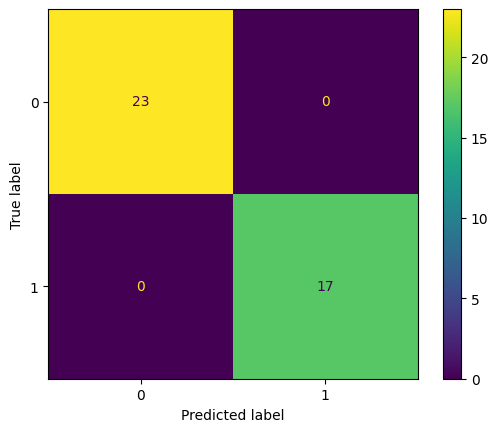

In [57]:
# Evaluation
cm = confusion_matrix(y_test,grid_pred)
diplay = ConfusionMatrixDisplay(cm)
diplay.plot()
plt.show()

In [59]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



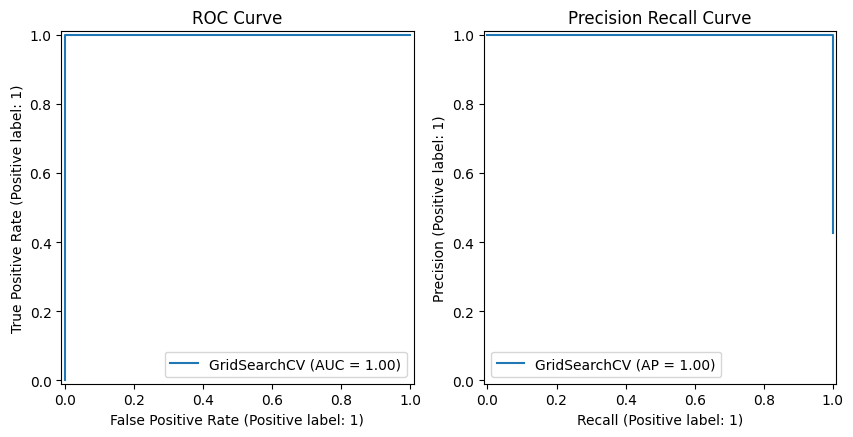

In [58]:
# Roc and Precision recall curve
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
RocCurveDisplay.from_estimator(grid_model,x_test,y_test,ax = ax1)
ax1.set_title('ROC Curve')
PrecisionRecallDisplay.from_estimator(grid_model,x_test,y_test,ax = ax2)
ax2.set_title('Precision Recall Curve')
plt.show()


**Perfect!! model performance got improved**